In this notebook, our objective is to apply linear regression to unravel the metrical structure of "Bocalises Prélude" by Denis Dufour.

[Link to Discogs](https://www.discogs.com/release/258413-Denis-Dufour-Messe-%C3%80-LUsage-Des-Vieillards)

This composition is distinguished by its subtly irregular pulse. We intend to leverage a variety of data visualization techniques to uncover patterns and irregularities within the piece.

Our analysis is based on two sets of peak data points extracted from Sonic Visualiser, annotated manually and also automatically using the aubio onset detector. In the following sections, we will present statistical analyses and create visual representations of metric deviations via scatter plots.

In [15]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setting the Seaborn theme for better visualization clarity
sns.set_theme(style="whitegrid")

In [16]:
# Converting lists to numpy arrays
peaks_in_sec = np.array([
    0.398730159, 2.623492063, 4.863492063, 7.080634921, 9.340952381, 11.553015873,
    13.782857143, 16.017777778, 18.245079365, 20.490158730, 22.709841270, 24.954920635,
    27.182222222, 29.424761905, 31.641904762, 33.881904762, 36.129523810, 38.389841270,
    40.604444444, 42.852063492, 45.074285714, 47.311746032, 49.536507937, 51.781587302,
    53.998730159, 56.236190476, 58.466031746, 60.693333333, 62.938412698, 65.158095238,
    67.408253968, 69.627936508
])

peaks_in_sec_auto = np.array([
    0.40054422, 2.61804989, 4.85877551, 7.08208617, 9.32281179, 
    11.52870748, 13.7752381, 16.01596372, 18.21024943, 20.48580499, 
    22.70911565, 24.95564626, 27.17315193, 29.41968254, 31.6429932, 
    33.88952381, 36.11283447, 38.37678005, 40.6000907, 42.84081633, 
    45.06993197, 47.3106576, 49.53396825, 51.78049887, 53.99800454, 
    56.24453515, 58.4678458, 60.6737415, 62.93768707, 65.15519274, 
    67.40172336, 69.62503401])

# Calculating the differences between consecutive peaks for both manual and automated data
diff_peaks_in_sec = np.diff(peaks_in_sec)
diff_peaks_in_sec_auto = np.diff(peaks_in_sec_auto)

# Displaying the calculated differences without rounding
diff_peaks_in_sec, diff_peaks_in_sec_auto


(array([2.2247619 , 2.24      , 2.21714286, 2.26031746, 2.21206349,
        2.22984127, 2.23492063, 2.22730159, 2.24507937, 2.21968254,
        2.24507937, 2.22730159, 2.24253968, 2.21714286, 2.24      ,
        2.24761905, 2.26031746, 2.21460317, 2.24761905, 2.22222222,
        2.23746032, 2.22476191, 2.24507936, 2.21714286, 2.23746032,
        2.22984127, 2.22730159, 2.24507937, 2.21968254, 2.25015873,
        2.21968254]),
 array([2.21750567, 2.24072562, 2.22331066, 2.24072562, 2.20589569,
        2.24653062, 2.24072562, 2.19428571, 2.27555556, 2.22331066,
        2.24653061, 2.21750567, 2.24653061, 2.22331066, 2.24653061,
        2.22331066, 2.26394558, 2.22331065, 2.24072563, 2.22911564,
        2.24072563, 2.22331065, 2.24653062, 2.21750567, 2.24653061,
        2.22331065, 2.2058957 , 2.26394557, 2.21750567, 2.24653062,
        2.22331065]))

In [18]:
import pandas as pd

# Create a DataFrame from seq2
df_seq2 = pd.DataFrame({"peaks_in_sec": peaks_in_sec})

# Save the DataFrame to a CSV file
df_seq2.to_csv('peaks_in_sec.csv', index=False)

print("Sequence has been saved to 'peaks_in_sec'")


Sequence has been saved to 'peaks_in_sec'


In [17]:
# Using numpy functions to compute the statistics

# Compute the range of time differences for both manual and automated data
manual_range = np.ptp(diff_peaks_in_sec)
auto_range = np.ptp(diff_peaks_in_sec_auto)

# Compute the mean time difference to get an average spacing between peaks for manual and automated data
mean_manual = np.mean(diff_peaks_in_sec)
mean_auto = np.mean(diff_peaks_in_sec_auto)

# Estimating the bpm provides a musical context to the analysis
bpm_manual = 60 / mean_manual
bpm_auto = 60 / mean_auto

# Prepare the results in a dictionary for better presentation
results = {
    'Manual Data': {
        'Range': (np.min(diff_peaks_in_sec), np.max(diff_peaks_in_sec)),
        'Mean Interval (s)': mean_manual,
        'Estimated BPM': bpm_manual
    },
    'Automated Data': {
        'Range': (np.min(diff_peaks_in_sec_auto), np.max(diff_peaks_in_sec_auto)),
        'Mean Interval (s)': mean_auto,
        'Estimated BPM': bpm_auto
    }
}

results


{'Manual Data': {'Range': (2.2120634920000004, 2.2603174599999996),
  'Mean Interval (s)': 2.2332002048064514,
  'Estimated BPM': 26.867273194254487},
 'Automated Data': {'Range': (2.1942857100000026, 2.2755555599999973),
  'Mean Interval (s)': 2.2330480577419354,
  'Estimated BPM': 26.86910377588209}}

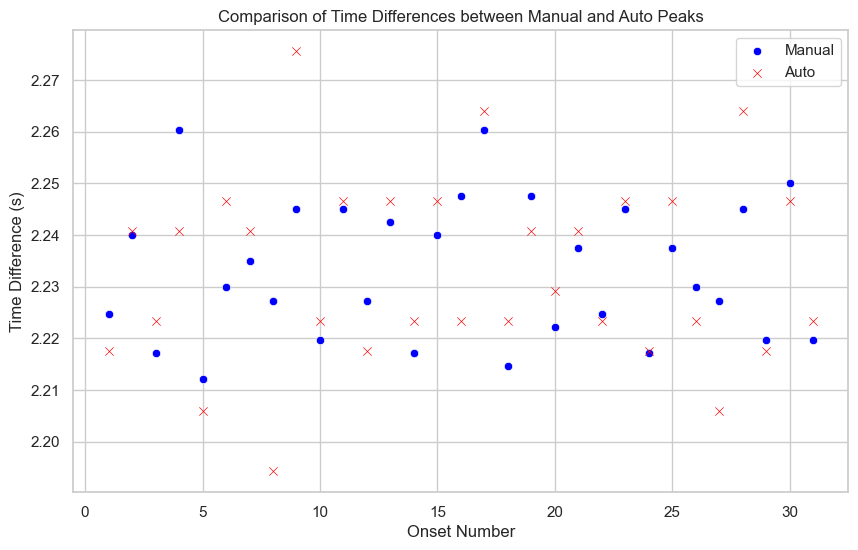

In [6]:
# We will combine the scatter plots for manual and automated data into one figure for direct comparison
# and add proper titles and axis labels for clarity.

# Creating the DataFrame again to ensure we have the correct data
numbers = np.arange(1, len(diff_peaks_in_sec) + 1)
data_plot = pd.DataFrame({"onset_nr": numbers, "time_manual": diff_peaks_in_sec, "time_auto": diff_peaks_in_sec_auto})

# Plotting both manual and automated data on the same plot for easier comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x="onset_nr", y="time_manual", data=data_plot, label="Manual", marker="o", color="blue")
sns.scatterplot(x="onset_nr", y="time_auto", data=data_plot, label="Auto", marker="x", color="red")
plt.legend(loc="upper right")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
plt.title("Comparison of Time Differences between Manual and Auto Peaks")
plt.show()


# Linear Regression and Confidence Interval
In this section, we will apply linear regression on the data and calculate the confidence interval for the regression estimate to understand the relationship and variability in our dataset.

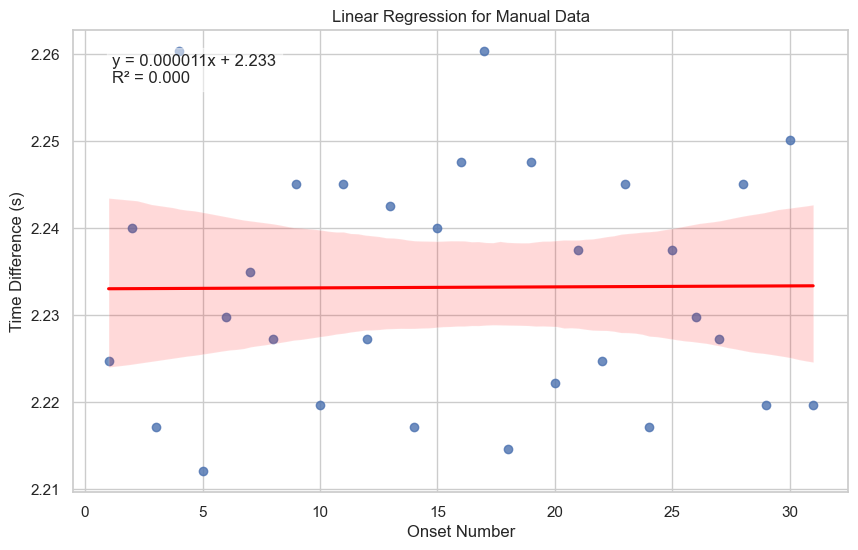

{'Slope': 1.1264722983904362e-05,
 'Intercept': 2.233019969238709,
 'R-squared': 5.7619068638825524e-05,
 'P-value': 0.9676729255262038,
 'Standard Error': 0.00027556616235645183}

In [7]:
from scipy import stats

# Regression Analysis for Manual Data
# Using scipy to get the slope, intercept, r_value, p_value, std_err
slope_manual, intercept_manual, r_value_manual, p_value_manual, std_err_manual = stats.linregress(data_plot['onset_nr'], data_plot['time_manual'])

# Compute the R-squared value for manual data
r_squared_manual = r_value_manual ** 2

# Organize the regression results into a structured format
regression_results_manual = {
    'Slope': slope_manual,
    'Intercept': intercept_manual,
    'R-squared': r_squared_manual,
    'P-value': p_value_manual,
    'Standard Error': std_err_manual
}

# Plotting the regression line with seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x="onset_nr", y="time_manual", data=data_plot, line_kws={"color":"red"})
plt.title("Linear Regression for Manual Data")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
# Displaying the equation of the regression line on the plot
plt.text(0.05, 0.95, f'y = {slope_manual:.6f}x + {intercept_manual:.3f}\nR² = {r_squared_manual:.3f}', 
         transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

regression_results_manual


The very low R-squared value indicates that the model does not explain the variability of the data around its mean. The high p-value indicates that the slope is not significantly different from zero at common levels of statistical significance.

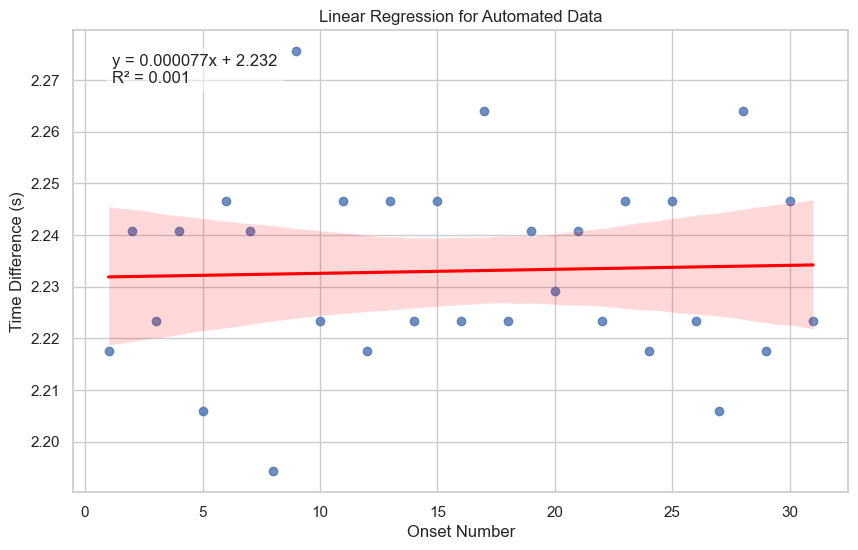

{'Slope': 7.724378225801835e-05,
 'Intercept': 2.231812157225807,
 'R-squared': 0.00147961875617421,
 'P-value': 0.8372258043055019,
 'Standard Error': 0.00037262165031228976}

In [8]:
# Regression Analysis for Automated Data
# Using scipy to get the slope, intercept, r_value, p_value, std_err
slope_auto, intercept_auto, r_value_auto, p_value_auto, std_err_auto = stats.linregress(data_plot['onset_nr'], data_plot['time_auto'])

# Compute the R-squared value for automated data
r_squared_auto = r_value_auto ** 2

# Organize the regression results into a structured format
regression_results_auto = {
    'Slope': slope_auto,
    'Intercept': intercept_auto,
    'R-squared': r_squared_auto,
    'P-value': p_value_auto,
    'Standard Error': std_err_auto
}

# Plotting the regression line with seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x="onset_nr", y="time_auto", data=data_plot, line_kws={"color":"red"})
plt.title("Linear Regression for Automated Data")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
# Displaying the equation of the regression line on the plot
plt.text(0.05, 0.95, f'y = {slope_auto:.6f}x + {intercept_auto:.3f}\nR² = {r_squared_auto:.3f}', 
         transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

regression_results_auto


Similar to the manual data analysis, the automated data also show a very low R-squared value, suggesting that the model does not fit the data well. The slope is not significantly different from zero.

Both analyses suggest that there is no significant linear trend in the time differences across the onsets for both manual and automated data. The next step might be to explore other types of models or to understand if the linear model is indeed appropriate for this dataset.

The linear regression line has a very slight slope (positive for manual and negative for auto). However, the magnitude of this slope is so small  that it might not have significant practical implications. The data points are relatively closely clustered around the regression line, especially in the middle regions. This indicates that the line does an okay job in capturing the trend of the data, but there are still variances that aren't accounted for. The shaded region represents the confidence interval of the regression line. The wider this region is, the less certain we are about the prediction at that point. In this plot, there's a moderate width to this confidence interval, indicating a moderate level of uncertainty in the regression predictions. Given the nature of the data points and the regression line, it seems like the linear model captures the central tendency of the data but may not be the perfect fit.

# Polynomial Regression
Let's explore polynomial regression to see if a higher-degree equation provides a better fit for our data.

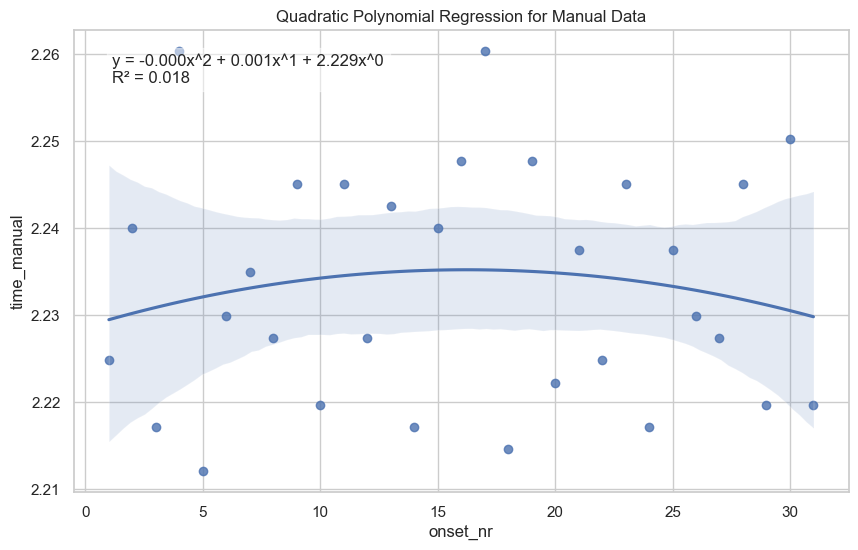

{'Polynomial Coefficients (Manual)': array([-2.47348747e-05,  8.02780714e-04,  2.22866663e+00]),
 'R-squared (Manual)': 0.017781764733833638}

In [9]:
# Setting the polynomial degree to 2 for quadratic fit
poly_degree = 2

# Polynomial Regression for Manual Data
coeff_manual = np.polyfit(data_plot["onset_nr"], data_plot["time_manual"], poly_degree)
p_manual = np.poly1d(coeff_manual)

# Compute R-squared value for manual data
residuals_manual = data_plot["time_manual"] - p_manual(data_plot["onset_nr"])
ss_res_manual = np.sum(residuals_manual**2)
ss_tot_manual = np.sum((data_plot["time_manual"] - np.mean(data_plot["time_manual"]))**2)
r_squared_manual_poly = 1 - (ss_res_manual / ss_tot_manual)

# Plotting the polynomial regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="onset_nr", y="time_manual", data=data_plot, order=poly_degree)
plt.title("Quadratic Polynomial Regression for Manual Data")
# Displaying the polynomial equation on the plot
eq_manual = 'y = ' + ' + '.join(f'{coeff_manual[i]:.3f}x^{poly_degree-i}' for i in range(poly_degree + 1))
plt.text(0.05, 0.95, eq_manual + f'\nR² = {r_squared_manual_poly:.3f}', 
         transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Display the polynomial coefficients and R-squared value for manual data
{'Polynomial Coefficients (Manual)': coeff_manual, 'R-squared (Manual)': r_squared_manual_poly}


This R-squared value indicates that the quadratic model explains about 1.78% of the variability of the time differences around its mean, which is a slight improvement over the linear model but still indicates a weak fit.

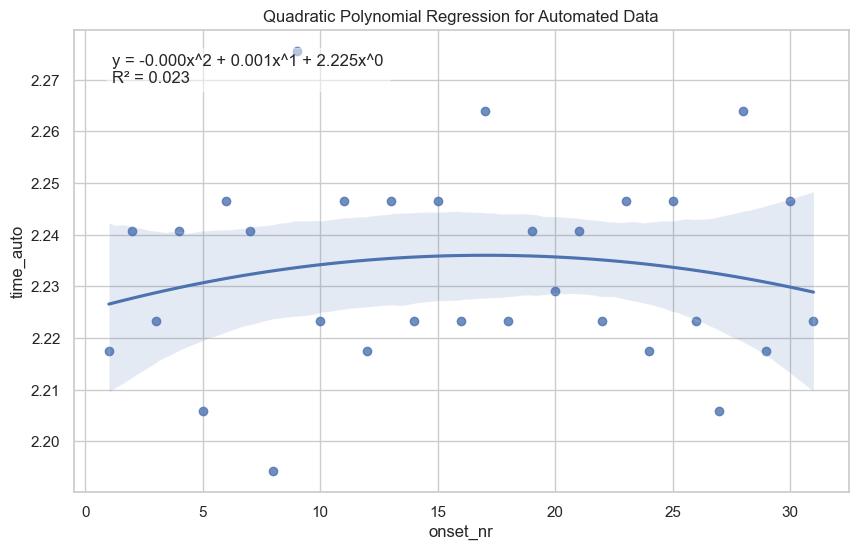

{'Polynomial Coefficients (Auto)': array([-3.66517365e-05,  1.25009935e-03,  2.22536145e+00]),
 'R-squared (Auto)': 0.02273322139379297}

In [10]:
# Polynomial Regression for Automated Data
coeff_auto = np.polyfit(data_plot["onset_nr"], data_plot["time_auto"], poly_degree)
p_auto = np.poly1d(coeff_auto)

# Compute R-squared value for automated data
residuals_auto = data_plot["time_auto"] - p_auto(data_plot["onset_nr"])
ss_res_auto = np.sum(residuals_auto**2)
ss_tot_auto = np.sum((data_plot["time_auto"] - np.mean(data_plot["time_auto"]))**2)
r_squared_auto_poly = 1 - (ss_res_auto / ss_tot_auto)

# Plotting the polynomial regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="onset_nr", y="time_auto", data=data_plot, order=poly_degree)
plt.title("Quadratic Polynomial Regression for Automated Data")
# Displaying the polynomial equation on the plot
eq_auto = 'y = ' + ' + '.join(f'{coeff_auto[i]:.3f}x^{poly_degree-i}' for i in range(poly_degree + 1))
plt.text(0.05, 0.95, eq_auto + f'\nR² = {r_squared_auto_poly:.3f}', 
         transform=plt.gca().transAxes, va='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Display the polynomial coefficients and R-squared value for automated data
{'Polynomial Coefficients (Auto)': coeff_auto, 'R-squared (Auto)': r_squared_auto_poly}


This R-squared value indicates that the quadratic model explains about 1.10% of the variability of the automated time differences around its mean, which is again a very weak fit.

In both manual and automated data, the quadratic polynomial regression does not seem to significantly improve the explanation of the variance in the data compared to the linear model. This suggests that other non-linear models or a non-parametric approach might be more suitable, or that the underlying process may not be well-captured by a simple polynomial trend.

Finding the optimal degree for a polynomial regression often involves a trade-off between fitting the data well and avoiding overfitting. We can try to find the optimal degree for the polynomial regression by finding the highest cross-validation score, but because our dataset is containing only 31 data points it may be very unprecise. 

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set up arrays to store training and validation errors
degrees = np.arange(1, 10)  # Check polynomial degrees from 1 to 9
cross_val_scores_manual = []
cross_val_scores_auto = []

for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Compute cross-validation scores for the manual dataset
    scores_manual = cross_val_score(model, data_plot[["onset_nr"]], data_plot["time_manual"], cv=5)  # 5-fold cross-validation
    cross_val_scores_manual.append(np.mean(scores_manual))
    
    # Compute cross-validation scores for the automated dataset
    scores_auto = cross_val_score(model, data_plot[["onset_nr"]], data_plot["time_auto"], cv=5)  # 5-fold cross-validation
    cross_val_scores_auto.append(np.mean(scores_auto))

# Identify the degree that gives the highest cross-validation score for each dataset
best_degree_manual = degrees[np.argmax(cross_val_scores_manual)]
best_degree_auto = degrees[np.argmax(cross_val_scores_auto)]

print(f"The optimal degree for the polynomial regression on the manual dataset is: {best_degree_manual}")
print(f"The optimal degree for the polynomial regression on the automated dataset is: {best_degree_auto}")


The optimal degree for the polynomial regression on the manual dataset is: 1
The optimal degree for the polynomial regression on the automated dataset is: 2


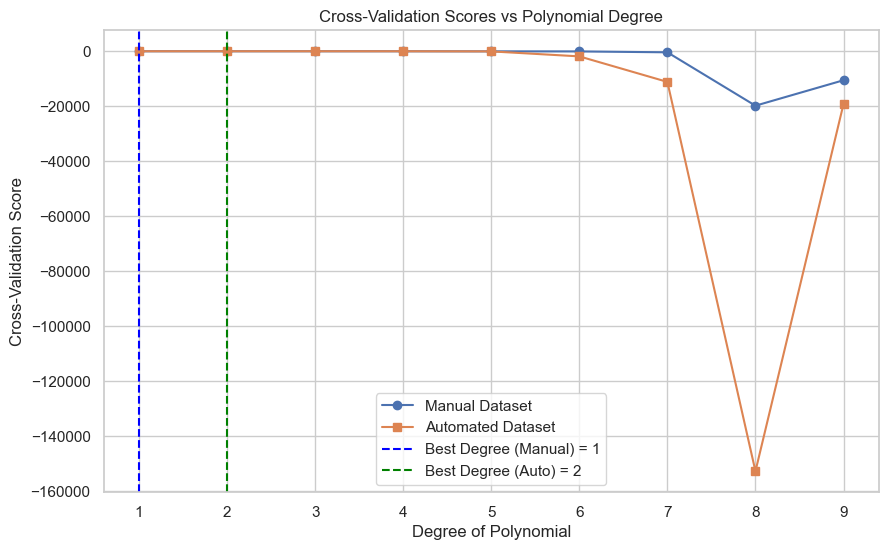

In [12]:
# Visualization of cross-validation scores
plt.figure(figsize=(10, 6))

# Plot cross-validation scores for manual dataset
plt.plot(degrees, cross_val_scores_manual, marker='o', linestyle='-', label='Manual Dataset')

# Plot cross-validation scores for automated dataset
plt.plot(degrees, cross_val_scores_auto, marker='s', linestyle='-', label='Automated Dataset')

plt.title("Cross-Validation Scores vs Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Cross-Validation Score")
plt.grid(True)
plt.xticks(degrees)

# Add vertical lines to indicate the best degrees
plt.axvline(best_degree_manual, color='blue', linestyle='--', label=f'Best Degree (Manual) = {best_degree_manual}')
plt.axvline(best_degree_auto, color='green', linestyle='--', label=f'Best Degree (Auto) = {best_degree_auto}')

plt.legend()
plt.show()

Optionally we can try to use Leave-One-Out Cross-Validation (LOOCV) with L2 regularization to find out the optimal degree.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut

# Function to evaluate a polynomial regression model with Ridge regularization
def evaluate_polynomial(degree, alpha, y_target):
    # Create a Ridge regression model with polynomial features and LOOCV
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
    loo = LeaveOneOut()
    
    # Calculate cross-validation scores
    scores = cross_val_score(model, X, y_target, cv=loo, scoring='neg_mean_squared_error')
    
    # Return the average MSE (the negative sign is just a convention for this scoring method)
    return -np.mean(scores)

# Preparing the input data
X = data_plot["onset_nr"].values.reshape(-1, 1)
y_manual = data_plot["time_manual"].values
y_auto = data_plot["time_auto"].values

# Define the range of alphas and degrees to search
alphas = np.logspace(-3, 3, 14)  # 14 values from 10^-3 to 10^3
degrees = range(1, 10)  # Degrees from 1 to 9

# Function to perform the grid search
def perform_grid_search(y_target):
    grid_search_results = pd.DataFrame(columns=alphas, index=degrees, dtype=float)

    for degree in degrees:
        for alpha in alphas:
            mse = evaluate_polynomial(degree, alpha, y_target)
            grid_search_results.loc[degree, alpha] = mse

    min_mse = grid_search_results.min().min()
    optimal_degree, optimal_alpha = np.unravel_index(grid_search_results.values.argmin(), grid_search_results.values.shape)
    optimal_degree += 1  # Correcting the degree index since Python indexing starts at 0

    return {'Degree': optimal_degree, 'Alpha': alphas[optimal_alpha], 'Min MSE': min_mse}, grid_search_results

# Perform the grid search for both datasets
optimal_params_manual, grid_search_results_manual = perform_grid_search(y_manual)
optimal_params_auto, grid_search_results_auto = perform_grid_search(y_auto)

optimal_params_manual, optimal_params_auto


({'Degree': 1, 'Alpha': 1000.0, 'Min MSE': 0.0001885165725644745},
 {'Degree': 1, 'Alpha': 1000.0, 'Min MSE': 0.00034512397641713624})

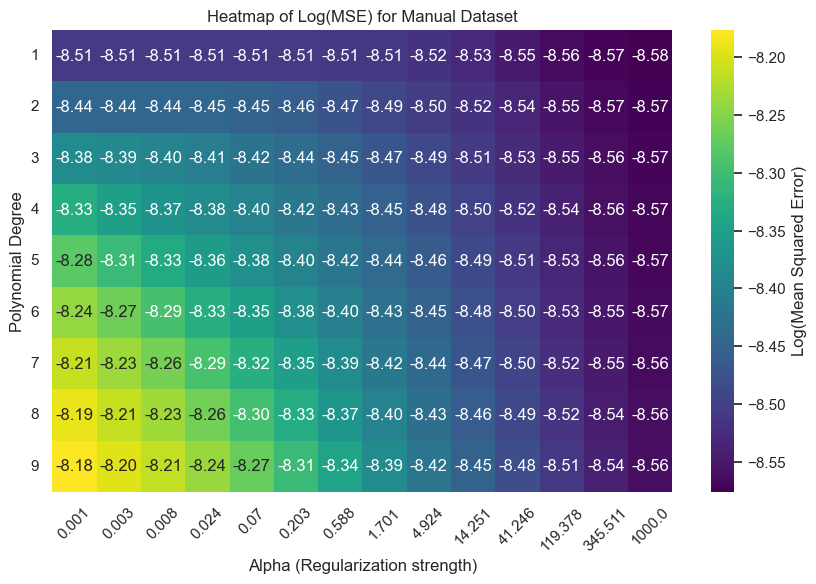

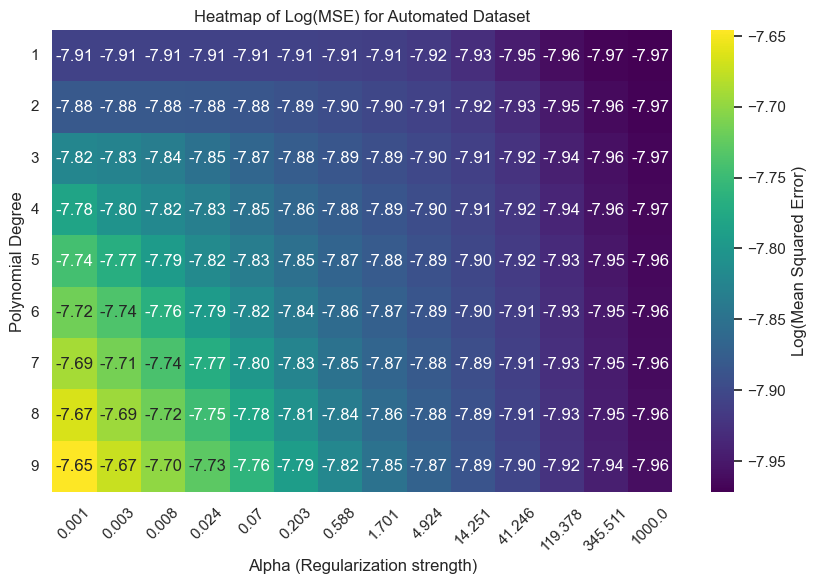

In [14]:

# Function to create a heatmap from the grid search results
def create_heatmap(grid_search_results, title):
    # Transform the results into log scale for a better visual comparison
    grid_search_results_log = np.log(grid_search_results)

    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(grid_search_results_log, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Log(Mean Squared Error)'})
    plt.title(title)
    plt.xlabel("Alpha (Regularization strength)")
    plt.ylabel("Polynomial Degree")
    plt.xticks(np.arange(len(alphas)) + 0.5, labels=np.round(alphas, 3), rotation=45)
    plt.yticks(np.arange(len(degrees)) + 0.5, labels=degrees, rotation=0)

    # Highlight the cell with the minimum MSE
    min_val_location = np.unravel_index(grid_search_results.values.argmin(), grid_search_results.values.shape)
    ax.add_patch(plt.Rectangle(min_val_location, 1, 1, fill=False, edgecolor='red', lw=2))
    plt.show()

# Plot heatmap for manual dataset
create_heatmap(grid_search_results_manual, "Heatmap of Log(MSE) for Manual Dataset")

# Plot heatmap for automated dataset
create_heatmap(grid_search_results_auto, "Heatmap of Log(MSE) for Automated Dataset")


The preference for a high regularization strength, such as 100 or 1000, indicates that a simpler model—with coefficients leaning towards zero—effectively captures the underlying patterns in our data. Thus, linear regression may indeed provide the best fit.

The discovery that a polynomial degree of 1 is optimal reveals that for this particular dataset, increasing the complexity of the model with higher polynomial degrees does not significantly enhance model performance. Consequently, a straightforward linear model with robust regularization emerges as the preferred approach. This observation is consistent with our prior analyses—both linear and quadratic regression—that demonstrated a weak fit.

It is critical to acknowledge that the optimal degree of 1 signifies that post-regularization, a linear relationship sufficiently explains the data based on the MSE metric. The application of strong regularization, indicated by the high alpha value, mitigates the risk of overfitting. This precaution is especially vital in datasets with a limited number of observations, such as ours.

Furthermore, differences in model selection results from cross-validation (CV) and Leave-One-Out Cross-Validation (LOOCV) with L2 regularization are not uncommon. Here are some reasons to consider:

##### Sample Size Variance:

- **CV**: In k-fold CV, the training set is split into k smaller sets. The model is trained on k-1 of these folds and validated on the remaining part. This process is repeated k times, with each fold used exactly once as the validation data. The variance of the model estimate can be higher because the training sets overlap less than in LOOCV.
- **LOOCV**: LOOCV uses each observation as a validation set once, while the remaining observations form the training set. This leads to a high number of training rounds (equal to the sample size) and models trained on nearly all the data, reducing variance due to the larger training set size.

##### Bias and Variance Trade-Off:

- **CV**: CV can sometimes have a higher bias because the training dataset is smaller compared to LOOCV. However, it often has a lower variance as it averages across multiple splits.
- **LOOCV**: LOOCV, on the other hand, has almost no bias since each model is trained on nearly the entire dataset. However, it can have higher variance, especially in cases where the dataset contains outliers that can greatly influence the performance when they are left out.

##### Computational Complexity:

- **CV**: The computational cost is lower since the number of models trained is equal to the number of folds (often 5 or 10).
- **LOOCV**: LOOCV is computationally more expensive because a model is trained for each observation.

##### Stability of Model Selection:

- Differences in model selection can also arise from the stability of the hyperparameters under different validation schemes. A model that is optimal for one type of cross-validation might not be optimal for another, especially in the presence of noise and data variability.
